In [29]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [30]:
X = pd.read_csv("scores1.csv") # Section 4 is same data as scores but shpae is (194,1)

In [31]:
X.shape

(194, 1)

In [32]:
X

,Score (on 1000)
0,689
1,522
2,231
3,708
4,534
...,...
189,801
190,531
191,444
192,418


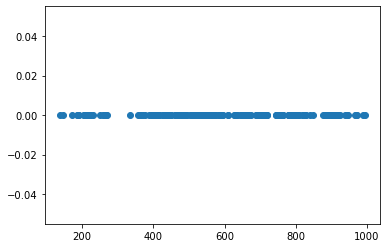

In [33]:
X.head
Y = []
for i in range(0,194):
    Y.append(0)

plt.scatter(X,Y)
plt.show()

In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Score (on 1000)  194 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


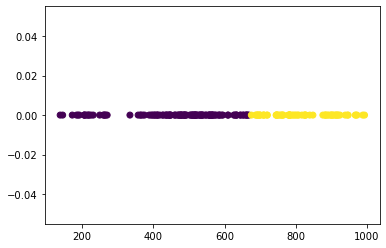

In [37]:
#Applying GMM:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=2, random_state = 20022212)
gmm.fit(X)
label = gmm.predict(X)
len(label)
plt.scatter(X, Y,c = label)
plt.show()


Label 0-28
Label 1-45
Label 2-21
Label 3-44
Label 4-26
Label 5-30
print

In [38]:
gmm.predict([[600],[782]])

array([0, 1], dtype=int64)

In [39]:
np.round(gmm.predict_proba([[600],[782]]),3)

array([[0.808, 0.192],
       [0.139, 0.861]])

In [40]:
print(gmm.means_)
print(gmm.weights_)

[[472.38731771]
 [797.36420817]]
[0.6378353 0.3621647]


In [41]:
print(gmm.covariances_)

[[[22697.35598936]]

 [[12869.34928012]]]


In [42]:
from scipy.stats import norm

In [43]:
numerator = norm.pdf(600,472.38731771,22697.35598936**0.5)*0.6378353 

In [44]:
denominator = norm.pdf(600,797.36420817,12869.34928012**0.5)*0.3621647 + norm.pdf(600,472.38731771,22697.35598936**0.5)*0.6378353

In [45]:
numerator/denominator

0.8079782679185876

In [46]:
Y = pd.DataFrame([400,200])

In [47]:
gmm.predict(Y)

array([0, 0], dtype=int64)

In [48]:
gmm.predict_proba(Y)

array([[9.98169834e-01, 1.83016632e-03],
       [9.99996318e-01, 3.68238220e-06]])

In [49]:
label

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

C:\Users\sumit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


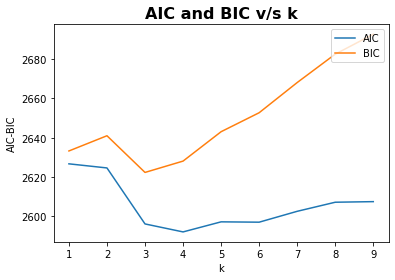

In [50]:
# Optimum finding 
from sklearn.mixture import GaussianMixture
Sum_bic = []
Sum_aic = []
K = range(1, 10)
for k in K:
    gmm = GaussianMixture(n_components=k)
    gmm = gmm.fit(X)
    Sum_bic.append(gmm.bic(X))
    Sum_aic.append(gmm.aic(X))

x1 = K
y1 = Sum_aic
plt.plot(x1, y1, label="AIC")
x2 = K
y2 = Sum_bic
plt.plot(x2, y2, label="BIC")

plt.title("AIC and BIC v/s k", fontsize=16, fontweight='bold')
plt.xlabel("k")
plt.ylabel("AIC-BIC")
plt.legend(loc='upper right')
plt.show()


# Counter example to GMM and k-Means

In [61]:
import sklearn
from sklearn import datasets
data = sklearn.datasets.make_moons(n_samples=100, shuffle=True, noise=None, random_state=None)

In [67]:
X = np.array([[ 3.27051370e-02,  2.46345416e-01],        [ 1.99794539e+00,  4.35929780e-01],        [ 1.61911895e-01, -4.55349012e-02],
        [ 1.98586378e-01, -9.81105305e-02],        [-4.62538290e-01,  8.86599306e-01],
        [ 2.81650650e-01, -1.95682551e-01],        [ 6.23489802e-01,  7.81831482e-01],        [-9.60230259e-02,  9.95379113e-01],
        [ 1.87131870e+00,  9.28244800e-03],        [ 3.45365054e-01,  9.38468422e-01],        [-9.26916757e-01,  3.75267005e-01],        [-4.04783343e-01,  9.14412623e-01],
        [ 1.34536505e+00, -4.38468422e-01],        [ 2.84527587e-01,  9.58667853e-01],        [ 9.49055747e-01,  3.15108218e-01],        [-1.59599895e-01,  9.87181783e-01],
        [ 9.67294863e-01,  2.53654584e-01],        [ 1.99179001e+00,  3.72122838e-01],        [ 1.28452759e+00, -4.58667853e-01],        [-5.18392568e-01,  8.55142763e-01],
        [ 0.00000000e+00,  5.00000000e-01],        [ 1.00000000e+00,  0.00000000e+00],        [-6.72300890e-01,  7.40277997e-01],        [ 1.71834935e+00, -1.95682551e-01],
        [ 1.83808810e+00, -4.55349012e-02],        [-1.00000000e+00,  1.22464680e-16],        [ 7.77479066e-01, -4.74927912e-01],        [-6.23489802e-01,  7.81831482e-01],
        [ 9.00968868e-01,  4.33883739e-01],        [ 1.96729486e+00,  2.46345416e-01],        [ 4.04783343e-01,  9.14412623e-01],        [ 1.40478334e+00, -4.14412623e-01],
        [ 9.67948422e-01, -4.99486216e-01],        [-8.71318704e-01,  4.90717552e-01],        [-3.20515776e-02,  9.99486216e-01],        [-9.97945393e-01,  6.40702200e-02],
        [-7.61445958e-01,  6.48228395e-01],        [-3.45365054e-01,  9.38468422e-01],        [-9.91790014e-01,  1.27877162e-01],        [ 1.59599895e-01,  9.87181783e-01],
        [ 7.30832427e-02,  1.24732995e-01],        [ 4.27883340e-01, -3.20172255e-01],        [ 1.67230089e+00, -2.40277997e-01],        [-9.00968868e-01,  4.33883739e-01],
        [ 3.27699110e-01, -2.40277997e-01],        [ 2.05460725e-03,  4.35929780e-01],        [ 1.62348980e+00, -2.81831482e-01],        [ 8.01413622e-01,  5.98110530e-01],
        [ 9.81559157e-01,  1.91158629e-01],        [ 2.00000000e+00,  5.00000000e-01],        [ 9.90311321e-02,  6.61162609e-02],        [ 1.28681296e-01,  9.28244800e-03],
        [ 5.95216657e-01, -4.14412623e-01],        [ 6.72300890e-01,  7.40277997e-01],        [-8.01413622e-01,  5.98110530e-01],        [ 1.92691676e+00,  1.24732995e-01],
        [-2.84527587e-01,  9.58667853e-01],        [-2.22520934e-01,  9.74927912e-01],        [ 3.20515776e-02,  9.99486216e-01],        [ 5.09442530e-02,  1.84891782e-01],        [ 1.09602303e+00, -4.95379113e-01],
        [-5.72116660e-01,  8.20172255e-01],        [ 8.38088105e-01,  5.45534901e-01],        [ 2.38554042e-01, -1.48228395e-01],        [ 1.03205158e+00, -4.99486216e-01],
        [ 1.51839257e+00, -3.55142763e-01],        [ 9.97945393e-01,  6.40702200e-02],        [ 9.26916757e-01,  3.75267005e-01],
        [ 9.60230259e-02,  9.95379113e-01],        [ 8.71318704e-01,  4.90717552e-01],        [ 1.84408430e-02,  3.08841371e-01],        [ 7.15472413e-01, -4.58667853e-01],
        [ 5.72116660e-01,  8.20172255e-01],        [-9.81559157e-01,  1.91158629e-01],        [ 1.90096887e+00,  6.61162609e-02],        [ 1.94905575e+00,  1.84891782e-01],
        [ 9.91790014e-01,  1.27877162e-01],        [ 8.40400105e-01, -4.87181783e-01],        [ 7.61445958e-01,  6.48228395e-01],
        [ 1.98155916e+00,  3.08841371e-01],        [ 1.76144596e+00, -1.48228395e-01],        [ 9.03976974e-01, -4.95379113e-01],
        [-9.49055747e-01,  3.15108218e-01],        [ 1.80141362e+00, -9.81105305e-02],        [ 4.62538290e-01,  8.86599306e-01],        [ 8.20998618e-03,  3.72122838e-01],
        [ 4.81607432e-01, -3.55142763e-01],        [ 1.46253829e+00, -3.86599306e-01],        [ 7.18349350e-01,  6.95682551e-01],        [ 2.22520934e-01,  9.74927912e-01],
        [ 3.76510198e-01, -2.81831482e-01],        [ 1.57211666e+00, -3.20172255e-01],        [ 5.18392568e-01,  8.55142763e-01],        [ 6.54634946e-01, -4.38468422e-01],
        [-7.18349350e-01,  6.95682551e-01],        [-8.38088105e-01,  5.45534901e-01],        [ 5.37461710e-01, -3.86599306e-01],        [ 1.22252093e+00, -4.74927912e-01],
        [-9.67294863e-01,  2.53654584e-01],        [ 1.15959990e+00, -4.87181783e-01]])

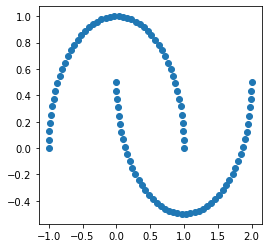

In [68]:
plt.figure(figsize=(4,4))
plt.scatter(X[:,0],X[:,1])
plt.show()

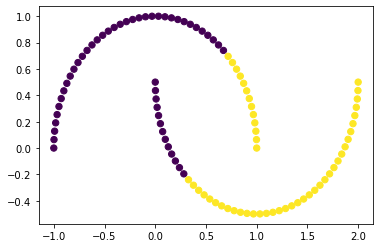

In [70]:
from sklearn.cluster import KMeans
kmm = KMeans(n_clusters=2)
kmm.fit(X)
labels = kmm.predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, s=40, cmap='viridis')
plt.show()

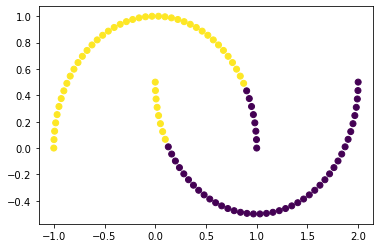

In [71]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)
gmm.fit(X)
labels = gmm.predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
plt.show()